## Project II - Regression Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'low fat', 'Regular', 'reg'],['LF','LF','REG','REG'])

In [4]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [5]:
avg = df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=avg, inplace=True)

In [6]:
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [7]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [8]:
df_real = pd.get_dummies(df, drop_first=True)
df_real

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_REG,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [9]:
X = df_real.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1,1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

## 59

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [13]:
predicted = rf_regressor.predict(X_test)
predicted

array([3148.13543 , 3940.930122, 6163.829924, ..., 2072.888404,
       2597.58541 , 2484.439358])

## 60

In [14]:
from sklearn import metrics

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R2:', metrics.r2_score(y_test, predicted))

MAE: 807.2988775085045
MSE: 1304384.600926181
RMSE: 1142.0965812601758
R2: 0.5578838660823151


## 61

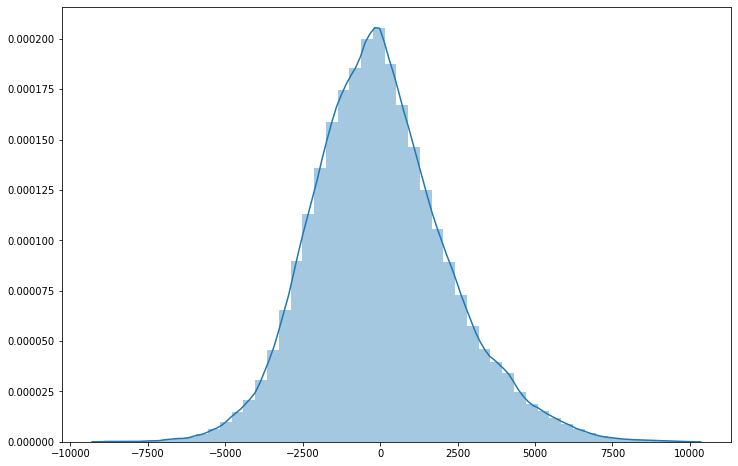

In [16]:
fig=plt.figure(figsize=(12,8))
sns.distplot((y_test-predicted), bins=50)

## 62

In [17]:
dict_compare = {'Sales': y_test.flatten(), 'Predicted': predicted.flatten()}
df_predicted = pd.DataFrame(dict_compare)
df_predicted

,Sales,Predicted
0,4426.2384,3148.135430
1,4845.0266,3940.930122
2,2293.0152,6163.829924
3,1065.2800,1875.738366
4,2345.6134,2378.337470
...,...,...
1700,3207.8244,2479.678888
1701,2263.7200,1231.223992
1702,1906.8512,2072.888404
1703,2773.0570,2597.585410


In [18]:
print(df_predicted.to_string())

           Sales    Predicted
0      4426.2384  3148.135430
1      4845.0266  3940.930122
2      2293.0152  6163.829924
3      1065.2800  1875.738366
4      2345.6134  2378.337470
5       322.2472   597.715292
6      1860.2452  1329.922184
7       209.7270   686.140190
8      4377.6350  4642.383712
9       322.9130  1040.112760
10      314.2576   511.926962
11       56.5930   196.171312
12     2407.5328  2367.970964
13     1647.8550  2373.736792
14     3560.6984  1611.082866
15      569.2590  1965.601392
16     4339.0186  3820.287162
17     2402.2064  1757.352468
18     4500.8080  2813.431112
19     4647.2840  4168.420666
20     2233.0932  1494.507944
21     1603.9122  2585.188214
22     2763.0700  1244.579940
23     6239.8776  4252.524522
24      588.5672   591.436798
25     1565.9616  2996.093342
26     4175.8976  4995.956802
27     1631.2100  2796.892640
28     1539.9954  2727.229986
29      745.6960  1813.552646
30     3775.0860  4372.821266
31     1491.3920  2206.035088
32     313

## 63

In [19]:
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.748766
Predicted,0.748766,1.000000


In [20]:
# Random Forest ไม่จำเป็นต้องทำ Standardization